# Results of Edge Detection Benchmark and Speedup

By: Xian Sun

## Serial Experiment

I compiled the serial code on HPCC using the following commands:

```
  module load libpng
  make clean
  make
  make test
  time make test
```

In ran the code time make test 10 times on hpcc to calculate average real time and obtained the following results

average real time after ten trails: 0.2374s

## Code Optimization

1. Use different levels of compiler optimization
2. Change the order of the loops (row and column) for the Average Filter, Gradient Filter and Edge Thresholding.
  
* basic optimization(-01): 0.0952s
  
  
* inter-procedural optimization(-02): 0.0926s
  
  
* global optimization(-03): 0.0914s

  change order of outer loops in average filter: 0.0856s

  change order of outer loops in gradient filter: 0.0896s

  change order of outer loops in edge thresholder: 0.0846s
  
  change order of three outer loops: 0.0746s

change order of outer loops in edge thresholder when using global optimization can result in fastest time

Text(0.5, 1.0, 'The time using different levels of optimization')

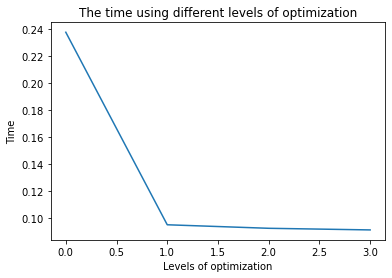

In [1]:
import matplotlib.pyplot as plt
levels = [0,1,2,3]
times = [0.2374,0.0952,0.0926,0.0914]
plt.plot(levels,times)
plt.xlabel("Levels of optimization")
plt.ylabel("Time")
plt.title("The time using different levels of optimization")

Text(0.5, 1.0, 'Time of different swaps of loops')

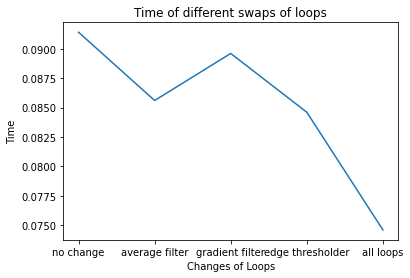

In [3]:
changes = ['no change','average filter','gradient filter','edge thresholder','all loops']
times = [0.0914,0.0856,0.0896,0.0846,0.0746]
plt.plot(changes,times)
plt.xlabel("Changes of Loops")
plt.ylabel("Time")
plt.title("Time of different swaps of loops")

## OpenMP Speedup

###Describe what you did to speed up your code using OpenMP###

* add #pragma omp parallel for schedule(dynamic) in front of every loop: 0.0736s
* add #pragma omp parallel for in front of every loop: 0.0744s
* add #pragma omp parallel for schedule(guided) shared(input, output) before average filter,

  add  #pragma omp parallel for schedule(guided) shared(input, output) private(Gx, Gy) before gradient filter, 
  
  add #pragma omp parallel for schedule(guided) shared(output) private(index) before thresholding: 0.736s.

Show your timing results as either a table or a graph.

Text(0.5, 1.0, 'Time of different omp commands')

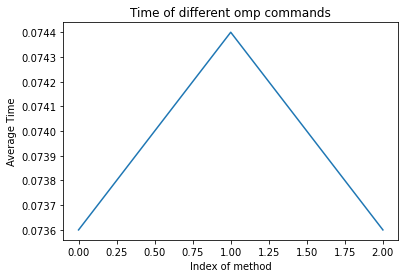

In [7]:
times = [0.0736,0.0744,0.0736]
plt.plot([0,1,2],times)
plt.xlabel("Index of method")
plt.ylabel("Average Time")
plt.title("Time of different omp commands")

## Concluding Discussion

In this homework, I have learned that the opotimization levels can play an important role in changing the speed of the code. As the optimization level goes up, the run time of the code decreases.While trying to use openmp to speed up the code, it is very important to keep trying and testing, try different scheduling options to find the best performance.

----